# Battleship AI Analysis

In [36]:
from game_physics import Game 
from game_variables import Settings as s

import pandas as pd
import numpy as np
import random 

import warnings
warnings.filterwarnings('ignore')

In [48]:

def run_simulation(iterations):
    player_1_wins = 0       
    player_0_wins = 0
    simulation_results = pd.DataFrame(columns=['test', 'winner', 'miss', 'steps'])

    for i in range(iterations):

        game = Game(False,False) 
        player_1_strategy = game.sequential_strategy
        player_0_strategy = game.random_strategy

        while not game.game_over_state:

            index = player_1_strategy() if game.turn else player_0_strategy()
            r = game.move(index)
            if r == -1: game.game_over_state = True  

        iteration_result = {
            'test' : i,
            'winner' : game.winner,
            'steps' : game.total_hits + game.total_miss,
            'miss' : game.total_miss
        }

        simulation_results = simulation_results.append( iteration_result, ignore_index = True)

        if game.turn:
            player_1_wins += 1
        if not game.turn: 
            player_0_wins += 1 

    # Print Results
    print(f'Ran {test_runs} test simulations:\n')

    # simulation_results['Hits'].plot()

#     print(simulation_results)

    print("Player 1 won: ", player_1_wins )
    print("Player 0 won: ", player_0_wins )
    
    return simulation_results

In [49]:
test_runs = 100
r = run_simulation(test_runs)

Ran 100 test simulations:

Player 1 won:  84
Player 0 won:  16


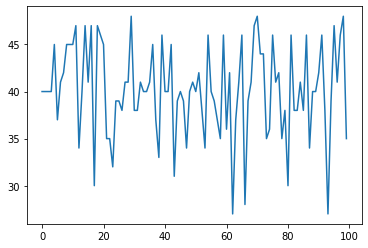

In [50]:
r.steps.plot()